In [2]:
import lightkurve as lk
import numpy as np
import pandas as pd
import glob
from astroquery.mast import Catalogs
from astropy.io import ascii
from astropy.table import Table, join, vstack
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#useful fcn - compares lists & returns what didnt match
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a

In [3]:
# unique item finder

def uniquefinder(mylist):
    seen = {}
    dupes = []
    uniq_tics = []
    for x in mylist:
        if x not in seen:
            seen[x] = 1
            uniq_tics.append(x)
        else:
            if seen[x] == 1:
                dupes.append(x)
            seen[x] += 1
    uniques = len(uniq_tics)
    print('there are {} unique tics. Use the first output dictionary'.format(uniques), \
          'to see number of occurances for duplicates')
    return seen, uniq_tics

# fixes missing totsec values in allstats table from extras that still said zero

In [7]:
#open data
secstats = ascii.read('data/bigstats_by_sector.fits') #og/add/ext tics
allstats = Table.read('data/bigstats_stitchedlcs.fits')#all acf/ls for all tics
goodtots = ascii.read('data/THIRDRUN/saved_indataas_bigstats_stitchedlcs/numofsectors_extras.csv')
#tics
alltics = np.load('data/all_dled_tics.npy') # list of new+old tics
goodtics = np.load('data/good_cvz_tics.npy') #only 10+ sectors



#CUTS to data
cvzstats = allstats[allstats['TOTsecs']>=10]
print(len(cvzstats))
cvzsecs = secstats[secstats['NUMsectors']>=10]
print(len(cvzsecs))

5806
71046


In [5]:
#compare data tables to isolate tics with wrong totsecs

# type(goodtics[0]),type(cvzstats['TOTsecs'][0]),type(cvzsecs['NUMsectors'][0])
# len(goodtics)
cvzids = cvzstats['ID']

notin_goods, notin_cvz = returnNotMatches(cvzids,goodtics)
print(len(notin_goods),len(notin_cvz))

# idss=[]
# for idx, i in enumerate(goodtics):
#     ids = np.where(allstats['ID']==i)[0]
#     idss.append(ids)
# idxs = np.concatenate(idss)
# len(idxs),len(idss)

0 204


(6009, 6010)

In [ ]:
#need to change id col name
goodtots.rename_column('IDS', 'ID')
#removing bad tic
goodtots.remove_row(np.where(goodtots['ID']==38877693)[0][0])

In [57]:
tics =[]
nums =[]
for tic,num in allstats['ID','TOTsecs']:
    #print(tic)
    if tic in goodtots['ID']:
        row = goodtots[goodtots['ID']==tic]
        ticid = int(row['ID'])
        sec = int(row['NUMsectors'])
        tics.append(tic)
        nums.append(sec)
    else:
        tics.append(tic)
        nums.append(num)
print(len(tics),len(nums))


24087 24087


In [59]:
newtable2add = Table([tics,nums],names=('ID','TOTsecs'))
newtable2add

ID,TOTsecs
int64,int64
25063396,11
25078120,10
25078674,13
25081173,12
25117273,13
25117406,10
25132314,12
25133286,13
25153007,12


In [60]:
len(newtable2add),len(allstats)

(24087, 24087)

In [62]:
#test to verify tic order stayed the same so can merge and have stats below to correct star
for count,i in enumerate(tics):
    val = allstats['ID'][count]
#     print(val,i)
    if i != val:
        print(count,i,val)

In [64]:
#


#merging table now---that went bad, just replace column b/c same tic order anyway
# newallstats = join(newtable2add,allstats,keys='ID',join_type='outer')
# len(newallstats),len(allstats)

(24091, 24087)

In [65]:
newallstats

ID,TOTsecs_1,TOTsecs_2,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,bytes12,bytes10,bytes16,bytes1,bytes19,bytes19,bytes8,int64,bytes4,bytes10,float64,float64,bytes10,float64,float64,float64,float64,bytes6,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,int64,float64,bytes5,bytes1,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,float64,float64,bytes6,float64,float64,float64,float64,int64,bytes1,bytes8,bytes8,bytes15,float64,float64,float64,float64,float64,float64,int64,int64,int64
24671921,1,1,0.007109463214874268,4.714723379698388,6.56151084234894,3.7102709489558077,0.3659571002372538,0.07985129054555644,0.04503873001476469,0.0694445,0.10138897000000001,0.11250009,0.46094237735754784,0.4577526606916515,0.45679454126364666,20190415,--,9147-00479-1,088-006118,02174757-7225033,N,J021747.55-722503.3,4644568429780642432,33528137,--,STAR,tmgaia2,34.4482217510531,-72.4176001947251,tmgaia2,-3.65382,0.0364772,5.77749,0.0357242,gaia2,2.97014,0.0214375,gaia2,294.160388804651,-43.2094271995752,318.2388411903,-70.4911761580997,11.906,0.175,11.455,0.012,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.328,0.026,10.029,0.025,9.986,0.025,AAA-222-111-000-0-0,nan,9.915,0.023,9.942,0.02,9.856,0.039,8.699,nan,11.276,0.000364,10.8858,0.006,rered,spect,6404.07,107.76,4.30389,0.0854392,-0.6,0.12,1.32552,0.0547688,1.29,0.201841,0.553901,0.122882,DWARF,2.66250777,0.1229225,333.453,2.402,0.0242846,0.0100505846,77,0.00598344952,N/A,N,0.00145012152,0.0103777,0.00972347,schlegel,0.138792,0.26489,0.0556266,0.0539111,0.110996,0.134767,0.0703183,0.10056,0.122903,0.122942,2.385,2.419,bj2018,128.371,87.1495,spect,11.5725,0.001416,10.8315,0.001285,1,N,tycho2v3,tycho2b3,N/A,0.701064465211099,0.554017317754182,34.4481696725391,-72.4175753194275,0.0217012028773991,0.0179917203604472,1,0,518150217
24672008,3,3,0.012545198202133179,4.271687145339628,4.334004243899395,4.211487874584006,0.0010542772203836542,0.0009844677965654013,0.0009590963793027039,0.138889,0.15416679,0.15000012000000001,0.07414631972458478,0.07411225355330245,0.07405462575060746,20190415,--,N/A,088-006116,02174403-7234346,N,J021744.49-723432.9,4644553478998527104,33528124,--,STAR,tmgaia2,34.4336744945758,-72.5762402095853,tmgaia2,178.354,0.0331487,131.544,0.0284528,gaia2,11.6551,0.0169377,gaia2,294.263282412239,-43.0696104538473,317.769209310265,-70.5160558879286,15.634,0.024,14.134,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.025,0.026,10.474,0.029

#### belwo this is old of above

In [63]:
# allstats

In [19]:
#merging newtots to table-----not good it overwrites the og tots for other tics

#need to change id col name
goodtots.rename_column('IDS', 'ID')
#merging
newallstats = join(goodtots,allstats,keys='ID',join_type='outer')
len(newallstats),len(allstats)

(24088, 24087)

In [21]:
#checking length diff
notin_new, notin_all = returnNotMatches(allstats['ID'],newallstats['ID'])
print(len(notin_new),len(notin_all),notin_all)

0 1 [38877693]


In [23]:
#verifying lcoation
goodtots[goodtots['ID']==38877693]

ID,NUMsectors
int64,int64
38877693,0


In [31]:
#testing how index prints for the removal in next cell
np.where(goodtots['ID']==38877693)[0][0]
np.where(newallstats['ID']==38877693)[0][0]

1464

In [32]:
#removing bad tic from both tables
goodtots.remove_row(np.where(goodtots['ID']==38877693)[0][0])
newallstats.remove_row(np.where(newallstats['ID']==38877693)[0][0])
print(len(newallstats),len(allstats))

24087 24087


In [34]:
#newallstats #damn didnt work

ID,NUMsectors,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,bytes12,bytes10,bytes16,bytes1,bytes19,bytes19,bytes8,int64,bytes4,bytes10,float64,float64,bytes10,float64,float64,float64,float64,bytes6,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,int64,float64,bytes5,bytes1,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,float64,float64,bytes6,float64,float64,float64,float64,int64,bytes1,bytes8,bytes8,bytes15,float64,float64,float64,float64,float64,float64,int64,int64,int64
24671921,--,1,0.007109463214874268,4.714723379698388,6.56151084234894,3.7102709489558077,0.3659571002372538,0.07985129054555644,0.04503873001476469,0.0694445,0.10138897000000001,0.11250009,0.46094237735754784,0.4577526606916515,0.45679454126364666,20190415,--,9147-00479-1,088-006118,02174757-7225033,N,J021747.55-722503.3,4644568429780642432,33528137,--,STAR,tmgaia2,34.4482217510531,-72.4176001947251,tmgaia2,-3.65382,0.0364772,5.77749,0.0357242,gaia2,2.97014,0.0214375,gaia2,294.160388804651,-43.2094271995752,318.2388411903,-70.4911761580997,11.906,0.175,11.455,0.012,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.328,0.026,10.029,0.025,9.986,0.025,AAA-222-111-000-0-0,nan,9.915,0.023,9.942,0.02,9.856,0.039,8.699,nan,11.276,0.000364,10.8858,0.006,rered,spect,6404.07,107.76,4.30389,0.0854392,-0.6,0.12,1.32552,0.0547688,1.29,0.201841,0.553901,0.122882,DWARF,2.66250777,0.1229225,333.453,2.402,0.0242846,0.0100505846,77,0.00598344952,N/A,N,0.00145012152,0.0103777,0.00972347,schlegel,0.138792,0.26489,0.0556266,0.0539111,0.110996,0.134767,0.0703183,0.10056,0.122903,0.122942,2.385,2.419,bj2018,128.371,87.1495,spect,11.5725,0.001416,10.8315,0.001285,1,N,tycho2v3,tycho2b3,N/A,0.701064465211099,0.554017317754182,34.4481696725391,-72.4175753194275,0.0217012028773991,0.0179917203604472,1,0,518150217
24672008,--,3,0.012545198202133179,4.271687145339628,4.334004243899395,4.211487874584006,0.0010542772203836542,0.0009844677965654013,0.0009590963793027039,0.138889,0.15416679,0.15000012000000001,0.07414631972458478,0.07411225355330245,0.07405462575060746,20190415,--,N/A,088-006116,02174403-7234346,N,J021744.49-723432.9,4644553478998527104,33528124,--,STAR,tmgaia2,34.4336744945758,-72.5762402095853,tmgaia2,178.354,0.0331487,131.544,0.0284528,gaia2,11.6551,0.0169377,gaia2,294.263282412239,-43.0696104538473,317.769209310265,-70.5160558879286,15.634,0.024,14.134,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.025,0.026,10.474,0.02

In [35]:
#saving new table---not yet run
#newallstats.write('data/bigstats_stitchedlcs.fits',format='fits',overwrite=True)

In [12]:
#making sure goodtots is whats missing from notin_cvz
newtots=[]
for i in notin_cvz:
    if i in goodtots['IDS']: #good they are all in there so just need to match goodtots with allsecs table
        newtots.append(i)
print(len(newtots))

204


In [16]:
allstats[allstats['ID']==notin_cvz[0]]
print(np.where(allstats['ID']==notin_cvz[0]))
allstats[112:116]

(array([114]),)


ID,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,bytes12,bytes10,bytes16,bytes1,bytes19,bytes19,bytes8,int64,bytes4,bytes10,float64,float64,bytes10,float64,float64,float64,float64,bytes6,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,int64,float64,bytes5,bytes1,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,float64,float64,bytes6,float64,float64,float64,float64,int64,bytes1,bytes8,bytes8,bytes15,float64,float64,float64,float64,float64,float64,int64,int64,int64
38846471,13,0.004999220371246338,11.604662335763374,10.49970705524371,6.017395260170704,0.0004142717825058226,0.0003986885306237724,0.0003700621563194553,0.11250009,0.22500018,0.33888916,0.3432687566527397,0.32923006489794315,0.3159631781823239,20190415,--,8884-00942-1,131-004299,04353154-6354582,N,J043531.53-635458.1,4675458590488659072,29814494,--,STAR,tmgaia2,68.881424194655,-63.9161674475258,tmgaia2,-5.46227,0.0497945,8.30597,0.0556528,gaia2,1.60639,0.0239298,gaia2,274.985984977282,-38.9203154801965,6.85548004108902,-80.8186922056534,10.742,0.078,10.323,0.005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9.651,0.03,9.478,0.022,9.425,0.019,AAA-222-111-000-0-0,nan,9.384,0.023,9.411,0.02,9.341,0.028,9.057,0.319,10.2791,0.000299,10.0138,0.006,rered,gaia2,6985.0,138.993,3.59877,0.0849027,nan,nan,3.25084,0.139198,1.53,0.260737,0.0445352,0.00999224,DWARF,22.6648178,1.28147745,611.567,9.0185,0.0273016,0.01039855,104,0.0196399167,N/A,N,0.00142165623,0.010237,0.0105601,schlegel,0.216072,0.305402,0.0943658,0.184031,0.00766357,0.0123209,0.0643155,0.10549,0.854275,1.70868,8.887,9.15,bj2018,161.737,116.249,dered,10.4803,0.000737,9.97292,0.000538,1,N,tycho2v3,tycho2b3,N/A,0.910065663031544,0.862929080409516,68.8813707062102,-63.9161316857202,0.0260925274584198,0.0231536994420388,1,0,526035625
38846515,13,0.005698859691619873,1.424666176006729,2.849485805144513,0.9498139865687361,0.061263047458900766,0.05934869116933134,0.05782478200859303,2.84861339,14.247233620000001,11.397231340000001,0.4724014751691718,0.4245844528749817,0.41135727833291136,20190415,--,8884-00719-1,130-004345,04355033-6401373,N,J043550.34-640137.4,4675352109658261376,29814627,--,STAR,tmgaia2,68.9597092399964,-64.0270368810381,tmgaia2,10.8454,0.0354002,-0.49937,0.0519677,gaia2,2.71534,0.020395,gaia2,275.107124300275,-38.8526337075915,6.32110961010616,-80.8978403729629,11.066,0.114,10.798,0.009,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9.928,0.027,9.715,0.022,9.669,0.0

# fixed both BIGSTATS tables (sectors/stitched)

In [ ]:
# allstats = Table.read('data/bigstats_stitchedlcs.fits')#all acf/ls for all tics
# secstats = ascii.read('data/bigstats_by_sector.fits') #og/add/ext tics

# statstics=[]
# for i in allstats['ID']:
#     si = str(i)
#     statstics.append(si)

In [ ]:
# print(type(statstics),type(alltics[0]))
# print(np.sum(allstats['TOTsecs']),len(secstats))
# # extras = pd.read_csv('data/THIRDRUN/numofsectors_extras.csv')
# # print(type(extras))
# # extrasid = extras.loc[:"ID"] #no , btwn :"ID" b/c never gave df an index ie df.set_index()
# notin_stats, notin_all  = returnNotMatches(alltics, statstics)
# print(len(notin_stats), len(notin_all),notin_all)

In [ ]:
# np.where(allstats['ID']==38877693)
# allstats[112:117]
# ##zeroallsecs = allstats[np.where(allstats['TOTsecs']==0)]['ID']
# # newtots=[]
# # for row in allstats:
# #     tic = row['ID']
# #     tot = row['TOTsecs']
# #     if tot == 0:
# #         sectot = secstats[np.where(secstats['ID']==tic)]['NUMsectors']
# #         print(tic,type(sectot),len(sectot))
# #         newtots.append(sectot)
# #     else:
# #         newtots.append(tot) 
# # print(len(newtots),len(allstats))

In [ ]:
# #index = np.where(allstats['ID']==38877693)
# #allstats[allstats.remove_row(115)] #already ran
# #allstats.write('data/bigstats_stitchedlcs.fits',format='fits') #already ran
# #allstats[np.where(allstats['ID']==38877693)]
# allstics=[]
# for i in alltics:
#     ii = int(i)
#     allstics.append(ii)
# allstics = np.array(allstics)
# np.save('data/all_dled_tics',allstics) #saved all tics as int so bothstats tables ids match

In [ ]:
# atest = Table.read('data/bigstats_stitchedlcs.fits')
# statstest=np.array(atest['ID'])
# len(atest['ID']),len(alltics)

In [ ]:
# allticstest = np.load('data/all_dled_tics.npy')
# print(type(alltics[0]),type(statstest[0]),type())
# notin_statstest, notin_all  = returnNotMatches(allticstest, statstest)
# #print(len(notin_statstest), len(notin_all),notin_all)

# first list from MAST dec cut

In [2]:
#all the cvz tic ids

mast_file = pd.read_csv('data/MAST_2019-09-30T1928.csv',skiprows=4)
mast_file.columns

Index(['dataproduct_type', 'calib_level', 'obs_collection', 'obs_id',
       'target_name', 's_ra', 's_dec', 't_min', 't_max', 't_exptime',
       'wavelength_region', 'filters', 'em_min', 'em_max',
       'target_classification', 'obs_title', 't_obs_release',
       'instrument_name', 'proposal_pi', 'proposal_id', 'proposal_type',
       'project', 'sequence_number', 'provenance_name', 's_region', 'jpegURL',
       'dataURL', 'dataRights', 'mtFlag', 'srcDen', 'intentType', 'obsid',
       'objID'],
      dtype='object')

In [3]:
#all tic ids from mast dec-cut catalog of available data files

tics = mast_file['target_name']
len(tics)

129685

In [5]:
#getting unique tic_ids

seen = set()
uniq_tics = []
for x in tics:
    if x not in seen:
        uniq_tics.append(x)
        seen.add(x)


print(len(uniq_tics))

29623


In [8]:
#removing bad tic id

uniq_cvz_tics=[]
for i in uniq_tics:
    if i == 'TESS FFI':
        print(i)
    else:
        uniq_cvz_tics.append(i)
uniq_cvz_tics=np.array(uniq_cvz_tics)
len(uniq_cvz_tics)
#note this was saved below
#np.save('data/unique_cvz_tics',uniq_cvz_tics)
#open with np.load('data/unique_cvz_tics.npy')

TESS FFI


In [ ]:
ra = mast_file['s_ra']
dec = mast_file['s_dec']
plt.plot(ra,dec)
print(np.min(dec),np.max(dec))

# matching to tic catalog

In [5]:
#get tic catalog for additional cvz tics from targetlists by sector
add_tics = np.load('data/additional_cvz_tics.npy')
catalog_data_TIC_additions = Catalogs.query_criteria(catalog="Tic",ID=add_tics)

#adding this addtional tic catalog to previous one and keeping same name
# ticcat = Table.read('data/tic_table.fits')
ticcat1 = ascii.read('data/tic_table.fits')
# ticcat = ticcat1[1].data
ticcat1

#kinda messy but below is how i rewrote the tic catalog - it worked but wasnt clean method to do it
tic_list = np.load('data/cool_cvz_tics.npy')
print(len(add_tics),len(catalog_data_TIC_additions),len(ticcat1),len(tic_list))
# #combining them
# bigticcatalog = vstack([ticcat1,catalog_data_TIC_additions])
# print(len(bigticcatalog))

# #saving new tic catalog table
# #ascii.write(bigticcatalog,'data/tic_table.fits') #forgot to put in overwrite=True, but it worked anyway
# #bigticcatalog.writeto('data/tic_table_test.fits')#never ran

1457 1457 31079 22629


In [6]:
#cleaning up tic table now that additions are in there
#PART ONE
tictable = ascii.read('data/tic_table.fits')
print(len(tictable))

31079


In [7]:
# #cleaning up tic table now that additions are in there
# #PART TWO
# #note that this whole cell wont run now b/c already run and rewrote teh beginning file



# idxs=[]
# idxs2=[]
# one, two = uniquefinder(tictable['ID'])
# for i in one:
#     if one[i] > 1:
#         #print(i,":",one[i])
#         idx = np.where(tictable["ID"] == i)
#         for row in idx:
#             #removing 2nd instance
#             second = row[1]
#             idxs2.append(second)
# #             if len(row)>= 2: #confirmed theres always only 2 of these doubles
# #                 print('hey:',len(row),'for tic:',i)
#             for i in row:
#                 idxs.append(i)
# print(len(idxs),len(idxs2),len(tictable))
# #tictable.remove_rows([idxs2]) #removed 2nd duplicate

there are 29824 unique tics. Use the first output dictionary to see number of occurances for duplicates
2510 1255 31079


/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/astropy/table/table.py:2017: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [9]:
#cleaning up tic table now that additions are in there
#PART THREE

#saving
# ascii.write(tictable,'data/tic_table.fits',overwrite=True) #already ran


In [11]:
#test to make sure saved correct & can be opened
tictable = ascii.read('data/tic_table.fits')
# tictable = Table.read('data/tic_table.fits')
len(tictable)

29824

In [9]:
#gets tic catalog for these unique cvz tics

catalog_data_TIC = Catalogs.query_criteria(catalog="Tic",ID=uniq_cvz_tics)
catalog_data_TIC
#note that this was saved as 'data/tic_table.fits' #above added additons to this table and kept same name
#open with fits.open('data/tic_table.fits')

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
str9,str8,int64,str12,str10,str16,str1,str19,str19,str8,int64,str4,str10,float64,float64,str10,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str5,str1,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str6,float64,float64,float64,float64,int64,str1,str8,str8,str15,float64,float64,float64,float64,float64,float64,int64,int64,str10
201247149,20190415,--,8470-00866-1,157-000001,00000193-5843068,--,J000001.89-584306.5,4919074289477561472,27125305,--,STAR,tmgaia2,0.00812834384887878,-58.7185599513949,tmgaia2,-38.7065,0.039479,19.922,0.034416,gaia2,5.48509,0.0271221,gaia2,315.230063171993,-57.1654355733512,326.792212723957,-51.6406936844022,12.361,0.218,11.623,0.015,--,--,--,--,--,--,--,--,--,--,10.491,0.023,10.129,0.023,10.074,0.021,AAA-222-111-000-0-0,--,10.019,0.022,10.062,0.019,10.008,0.05,9.011,--,11.6106,0.000228,11.1402,0.006,rered,gaia2,5558.0,125.63,4.60363,0.0777444,--,--,0.818151,0.0405226,0.98,0.12427,1.78948,0.385662,DWARF,0.5754868,0.0191534,181.361,0.899,0.00734151,0.01002564,41,0.00278697722,--,--,0.00172620546,0.00937738,0.0106739,schlegel,0.0976062,0.150934,0.0329171,0.0481281,0.501388,0.269937,0.106015,0.0494738,0.0183857,0.0199211,0.895,0.903,bj2018,178.012,73.2476,dered,11.9885,0.001283,11.0875,0.000934,1,--,tycho2v3,tycho2b3,--,0.702403391279619,0.533776039301982,0.00780738966833443,-58.718474176516,0.0206332827156373,0.0187107303147441,1,0,507487171
201247436,20190415,--,8470-01087-1,151-000015,00011622-5949402,--,J000116.25-594940.3,4918008072436519040,27125798,--,STAR,tmgaia2,0.317581129520287,-59.8278591967619,tmgaia2,21.4505,0.0424992,-2.88959,0.0379614,gaia2,4.95343,0.0266164,gaia2,314.241917614466,-56.185184996816,325.818028675206,-52.5881683012755,10.823,0.073,10.352,0.005,--,--,--,--,--,--,--,--,--,--,9.41,0.021,9.234,0.021,9.21,0.026,AAA-222-111-000-0-0,--,9.136,0.022,9.17,0.02,9.129,0.031,8.551,--,10.2064,0.00025,9.8764,0.006,rered,spect,6656.5,136.264,4.43704,0.0912293,-0.22,0.12,1.18462,0.0544095,1.4,0.242404,0.842158,0.204986,DWARF,2.482189,0.1246275,200.715,1.0805,0.00867203,0.0105157,48,0.00124877016,--,--,0.00233858358,0.0108494,0.010182,schlegel,0.179009,0.305799,0.0678131,0.041006,0.191743,0.218229,0.0823597,0.100099,0.112983,0.136272,1.075,1.086,bj2018,114.099,158.43,spect,10.4586,0.001039,9.83329,0.000906,1,--,tycho2v3,tycho2b3,--,0.760269661207147,0.588690860355547,0.317764886752469,-59.8278716381803,0.0207500646104445,0.0184490786562237,1,0,507487417
201248233,20190415,--,--,172-000020,00012547-5539491,--,J000125.80-553948.2,4923563835972259456,--

In [25]:
tictable = Table.read('data/tic_table.fits') #tic catalog for teffs

-77.99592500091799 -55.500299


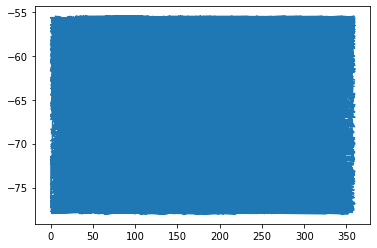

In [6]:

ra = mast_file['s_ra']
dec = mast_file['s_dec']
plt.plot(ra,dec)
plt.ylabel('DEC')
plt.xlabel('RA')
plt.title('MAST tic ra/dec')
print(np.min(dec),np.max(dec))

# using tic 2min target lists from sectors

In [3]:
#from 2nd run of cleaning & stitching lcs

totsector1 = np.load('data/SECONDRUN/stitched_sectors.npy')
totsector2 = np.load('data/SECONDRUN/stitched_sectors2.npy')
totsectors_rd = np.append(totsector1,totsector2)
ticorder1 = np.load('data/SECONDRUN/tic_order.npy')
ticorder2 = np.load('data/SECONDRUN/tic_order2.npy')
ticorder_rd = np.append(ticorder1,ticorder2)

t = Table([ticorder_rd,totsectors_rd],names=('ID','TOTsecs'))
print('t len',len(t))

t len 22631


1407 1626 1407 1626


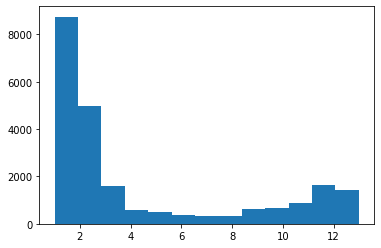

In [4]:
#2nd run stats to get total # of sectors
plt.hist(t['TOTsecs'],bins=13);
onethree = []
onetwo = []
tics13 = []
tics12=[]
for idx,num in enumerate(t['TOTsecs']):
    if num == 13:
        onethree.append(num)
        tics13.append(int(t['ID'][idx]))
    elif num == 12:
        onetwo.append(num)
        tics12.append(int(t['ID'][idx]))
    else:
        pass
print(len(onethree),len(onetwo),len(tics13),len(tics12))

In [5]:
#not the cool list (b/c of those 2 ids) but these have 13/12 sectors
mycvz = np.append(tics13,tics12)
mycvz,len(mycvz)

(array([139369433, 139369436, 139370537, ...,  55849733,  55850152,
         55850719]), 3033)

In [6]:
#cool list

cool =np.load('data/cool_cvz_tics.npy')
cools=[]
for i in cool:
    newi = int(i)
    cools.append(newi)
cools=np.array(cools)
coolt = Table([cools,],names=('ID',))
len(cools),cools.dtype

(22629, dtype('int64'))

In [64]:
#from 2min target lists per sector

#columns:
# TIC.   #Camera.    #CCD.   #Tmag.     #RA.     #Dec.   
camera4=[]
camera3=[]
alltics=[]
allcams=[]
alldecs=[]
allras=[]
allccds=[]
alltmags=[]
for i in range(1,14,1):
    if i <10:
        #f = ascii.read('/Users/helenfellow/Desktop/all_targets_S00{}_v1.txt'.format(i))
        f = ascii.read('data/targets_by_sector/all_targets_S00{}_v1.txt'.format(i))
    else:
        #f = ascii.read('/Users/helenfellow/Desktop/all_targets_S0{}_v1.txt'.format(i))
        f = ascii.read('data/targets_by_sector/all_targets_S0{}_v1.txt'.format(i))
    for row in f:
        #print(row)
        #break
        camera = row['col2']
        tic = np.array(row['col1'])
        dec = np.array(row['col6'])
        ra = np.array(row['col5'])
        ccd = np.array(row['col3'])
        tmag = np.array(row['col4'])
        alltics.append(tic)
        allcams.append(camera)
        alldecs.append(dec)
        allras.append(ra)
        allccds.append(ccd)
        alltmags.append(tmag)
        #for cam in camera:
        if camera == 4:
            camera4.append(tic)
        elif camera == 3:
            camera3.append(tic)
allcams=np.array(allcams)
alltics=np.array(alltics)
camera4=np.array(camera4)
camera3=np.array(camera3)
alldecs=np.array(alldecs)
allccds=np.array(allccds)
alltmags=np.array(alltmags)
allras=np.array(allras)

#saving as a table
# targetstable = Table([alltics,allcams,allccds,alltmags,allras,alldecs], \
#                      names=('ID','CAMERA','CCD','Tmag','RA_target','DEC_target'))
# #before saving want a table column that tells how many times tic is in the table (ie#sectors)
# #ascii.write(targetstable,'data/targets_by_sector.fits')
print(len(camera4),camera4.shape,len(camera3),camera3.shape)

97498 (97498,) 54977 (54977,)


In [48]:
#not sure this is useful

# making 2min sector lists into a table

sect = Table([alltics,allcams,allras,alldecs],names=('ID','CAM','RA','DEC'))
# print(len(sect),len(coolt))
# coolsec = join(coolt,sect,keys='ID')
# coolsec


this also shows that there are gaps!!!


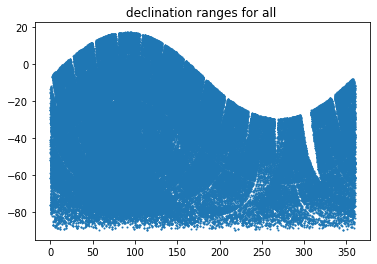

In [46]:
#this isnt really what i want, i want decs for only those dupes
x = np.arange(0,len(alldecs),1)
plt.scatter(allras,alldecs,s=1)
plt.title('declination ranges for all ');
print('this also shows that there are gaps!!!')

In [49]:
#finding duplicates in 2min targets lists


#all 2min targets - no matter camera and seeing how many repeats there are ever
seen = {}
dupes = []
#cams = {}
for row in sect:
    x=row['ID']
    c=row['CAM']
    if x not in seen:
        seen[x] = 1
       # cams[x] == c
    else:
        if seen[x] == 1:
            dupes.append(x)
           # cams[x] == c
        seen[x] += 1
print(len(seen),len(dupes))

128292 35827


In [62]:
len(alltics),len(seen),alltics[124], seen[25170085]

(247899, 128292, 25170085, 1)

In [67]:
#adding totnumber of sectors available to table
totsecs=[]
for i in alltics:
    totsec = seen[i]
    #print(totsec)
    totsecs.append(totsec)
print(len(totsecs),totsecs[124])


#adding column & writing to table
targetstable = Table([alltics,totsecs,allcams,allccds,alltmags,allras,alldecs], \
                     names=('ID','TOTALsectors','CAMERA','CCD','Tmag','RA_target','DEC_target'))

targetstable
#saving to file
#ascii.write(targetstable,'data/targets_by_sector.fits') #already saved

247899 1


In [16]:
#comparing lists of mytics with 12/13 sectors & targettics with 12/13 sectors
notindupes,notinmycvz = returnNotMatches(mycvz, dupes)
len(notindupes),len(notinmycvz) #not in dupes, not in mycvz

(0, 32794)

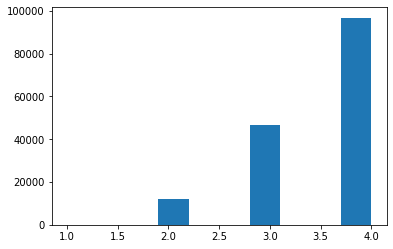

In [38]:
#seeing which camera these dupes came from 
#oddly not just cams 3/4.....

mylist=[]
for row in sect:
    tic = row['ID']
    if tic in dupes:
        cam = row['CAM']
        mylist.append(cam)
plt.hist(mylist);

In [36]:
#the numbers from histogram above

fours=[]
threes=[]
twos=[]
ones=[]
for i in mylist:
    if i == 4:
        fours.append(i)
    elif i == 3:
        threes.append(i)
    elif i == 2:
        twos.append(i)
    else:
        ones.append(i)
print(len(fours),len(threes),len(twos),len(ones))

96753 46498 12151 32


In [17]:
#combining cool & sectortargetsdupes

cooltargets = np.append(dupes,cools)
print(len(cooltargets),len(dupes),len(cools))

# finding unique tics

seen2 = {}
dupes2 = []
for tic in cooltargets:
    if tic not in seen2:
        seen2[tic] = 1
    else:
        if seen2[tic] == 1:
            dupes2.append(tic)
        seen2[tic] += 1
print(len(seen2),len(dupes2)) 
#dupes2 should be all cvz-ish (some of mine still arent-
#but need total number of sectors stitched)

58456 35827 22629
44568 13888


In [19]:
notindupes2,notinmycvz2 = returnNotMatches(mycvz, dupes2)
len(notindupes2),len(notinmycvz2) ,len(mycvz) #not in a, not in b

(0, 10855, 3033)

In [20]:
#trying to see of those 10855 additional tics that appear in multiple sectors, how many is multiple?
testmylist=[]
for row in sect:
    tic = row['ID']
    if tic in notinmycvz2:
        cam = row['CAM']
        testmylist.append(cam)

testfours=[]
testthrees=[]
testtwos=[]
testones=[]
for i in testmylist:
    if i == 4:
        testfours.append(i)
    elif i == 3:
        testthrees.append(i)
    elif i == 2:
        testtwos.append(i)
    else:
        testones.append(i)
print(len(testfours),len(testthrees),len(testtwos),len(testones))

32550 13943 2203 0


In [21]:
#finding unique tics in cam4 
seentest = {}
dupestest = []
for tic in camera4:
    if tic not in seentest:
        seentest[tic] = 1
    else:
        if seentest[tic] == 1:
            dupestest.append(tic)
        seentest[tic] += 1
print(len(seentest),len(dupestest)) 

12578 11144


In [34]:
cam4uniqtic=[]
for i in seentest.keys():
    cam4uniqtic.append(i)
    #break
cam4uniqtics= np.array(cam4uniqtic)

In [36]:
#matching unique tics from cam4 with notinmycvz tics to find those with 
#likely full sectors

notincam4uniqs,notinmycvz3 = returnNotMatches(mycvz, cam4uniqtics)
len(notincam4uniqs),len(notinmycvz3) 

(0, 9545)

2795 2795


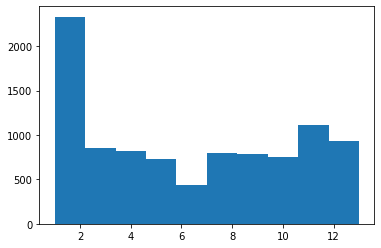

In [42]:
#finding how many sectors saw those 9545 additional cam4 tics
sects=[]
add=[]
thosetics=[]
for tic in notinmycvz3:
    sect = seentest[tic]
    sects.append(sect)
    if sect >=10:
        one=1
        add.append(one)
        thosetics.append(tic)
plt.hist(sects);
print(len(add),len(thosetics))

In [45]:
#making sure those tics are reallynew

notincam4wmorethan10,notinmycvz4 = returnNotMatches(mycvz, thosetics)
print(len(notincam4wmorethan10),len(notinmycvz4))
print('good these are totally brand new tics in cvz-ish area')
#np.save('data/new_cvz_tics',thosetics)

3033 2795
good these are totally brand new tics in cvz-ish area


In [ ]:
#making a master list of cvz-ish
#WAIT mycvz=12or13 sects but thosetics=10ormoresects
#ALSO compare with below md allcvztics

# left off above

In [12]:
#combining cools that im sure are in cvz (12/13 sectors) & dupes from sector target lists

cvzonly = np.append(dupes,mycvz)
print(len(dupes),len(mycvz),len(cvzonly))

# finding unique tics

seen3 = {}
dupes3 = []
for tic in cvzonly:
    if tic not in seen3:
        seen3[tic] = 1
    else:
        if seen3[tic] == 1:
            dupes3.append(tic)
        seen3[tic] += 1
print(len(seen3),len(dupes3)) 
print('wait so i already have these?')

35827 3033 38860
35827 3033
wait so i already have these?


#### trying to verify that weird result that i already have these

In [15]:
#finding how many sectors belong to each tic in dupes
cvz13secs=[]
cvz12secs=[]
nocvz=[]
sec10n11=[]
for row in sect:
    tic = row['ID']
    if seen[tic] ==13:
        cvz13secs.append(tic)
    elif seen[tic] ==12:
        cvz12secs.append(tic)
    elif seen[tic] <=10:
        nocvz.append(tic)
    else:
        sec10n11.append(tic)
print(len(cvz13secs),len(cvz12secs),len(nocvz),len(sec10n11))

23764 25884 185359 12892


In [16]:
#finding unique tics from target lists that have 13 sectors
seen4 = {}
dupes4 = []
for tic in cvz13secs:
    if tic not in seen4:
        seen4[tic] = 1
    else:
        if seen4[tic] == 1:
            dupes4.append(tic)
        seen4[tic] += 1
print(len(seen4),len(dupes4))


#finding unique tics from target lists that have 12 sectors
seen5 = {}
dupes5 = []
for tic in cvz12secs:
    if tic not in seen5:
        seen5[tic] = 1
    else:
        if seen5[tic] == 1:
            dupes5.append(tic)
        seen5[tic] += 1
print(len(seen5),len(dupes5))

1828 1828
2157 2157


In [18]:
# combining teh definite cvz tics with 13/12 sectors 

targetcvz= np.append(dupes5,dupes4)
allcvz = np.append(mycvz,targetcvz)
print(len(targetcvz),len(mycvz),len(allcvz))
# finding unique tics

seen6 = {}
dupes6 = []
for tic in allcvz:
    if tic not in seen6:
        seen6[tic] = 1
    else:
        if seen6[tic] == 1:
            dupes6.append(tic)
        seen6[tic] += 1
print(len(seen6),len(dupes6)) 
print('so theres 3033 overlap....i did already have those')
print('but',len(allcvz),'minus',len(dupes6),'should be all unique cvz tics')

3985 3033 7018
3985 3033


# ALL CVZ TICS BELOW !!!!

In [74]:
# isolating cvz tics from my list & sector target lists
cvz_tics=[]
inttic=[]
for tic in seen6.keys():
    tics = str(tic) #so i can compare with tic catalog ID column
    cvz_tics.append(tics)
    inttic.append(tic)
#cvz_tics=np.array(cvz_tics) #needs to be a string
inttic=np.array(inttic)
#print(len(cvz_tics),cvz_tics)

# ALL CVZ TICS ABOVE!!!!!!

In [75]:
#making those cvz tics a table so easier to join

cvztable = Table([cvz_tics,],names=('ID',))
cvztable['ID'].dtype,len(cvztable)

(dtype('<U9'), 3985)

In [76]:
#comparing this with previous cvz list

oldduptics = np.load('data/dupes_tics.npy')
#len(oldduptics)#11144 #but these included less than 12 sectors
oldt = Table([oldduptics,],names=('ID',))
intcvzt = Table([inttic,],names=('ID',))
mytest = join(oldt,intcvzt)
print(len(mytest))
print('this proves that old dupes list INCLUDES my cvz_tics' \
      ' but with less than 12 sectors')

3985

# merging cvz list with tic catalog & thirdrun calculations

In [47]:
### opening/creating stat table

#tic order
ids = np.load('data/THIRDRUN/tic_order.npy')
#rvar
rvar = np.load('data/THIRDRUN/rvar_original.npy')
#stats
acf1 = np.load('data/THIRDRUN/acf_rp1.npy')
acf2 = np.load('data/THIRDRUN/acf_rp2.npy')
acf3 = np.load('data/THIRDRUN/acf_rp3.npy')
ls1 = np.load('data/THIRDRUN/ls_rp1.npy')
ls2 = np.load('data/THIRDRUN/ls_rp2.npy')
ls3 = np.load('data/THIRDRUN/ls_rp3.npy')
acfamp1 = np.load('data/THIRDRUN/acf_amp1.npy')
acfamp2 = np.load('data/THIRDRUN/acf_amp2.npy')
acfamp3 = np.load('data/THIRDRUN/acf_amp3.npy')
lsamp1 = np.load('data/THIRDRUN/ls_amp1.npy')
lsamp2 = np.load('data/THIRDRUN/ls_amp2.npy')
lsamp3 = np.load('data/THIRDRUN/ls_amp3.npy')
#make it a table
stats = Table([ids,rvar,acf1,ls1,acf2,ls2,acf3,ls3,acfamp1,acfamp2,acfamp3,lsamp1,lsamp2,lsamp3], \
              names=('ID','rvar','acf1','ls1','acf2','ls2','acf3','ls3','acfamp1','acfamp2','acfamp3','lsamp1', \
                     'lsamp2','lsamp3'))


### tic catalog
tictable = Table.read('data/tic_table.fits') #tic catalog for teffs

print(len(stats),len(tictable),len(cvztable))

22629 29622 3985


In [51]:
finalt = join(tictable,cvztable) #this minus that = most of the additional tics
finalt2 = join(stats,cvztable) #that
finalt3 = join(finalt,stats)
finalt4 = join(tictable,stats)
finalt5 = join(finalt4,cvztable)
print(len(finalt),len(finalt2),len(finalt3),len(finalt4),len(finalt5))
print('based on these differences, those target lists' \
        ' added',len(cvztable)-len(finalt5),'more cvz tics')

3877 3039 3039 22629 3039
based on these differences, those target lists added 946 more cvz tics


# plotting results overlay mq data

In [60]:
#def my variables
temp = finalt5['Teff']
lsrp1 = finalt5['ls1']
acfrp2 = finalt5['acf2']
Rvar = finalt5['rvar']
#adding mcquillan data
mq_data = pd.read_csv('INTERN_DATA/McQuillan_data.csv')#my path
#naming variables
massmq = mq_data['Mass']
rpmq = mq_data['Prot']
tempmq = mq_data['Teff']

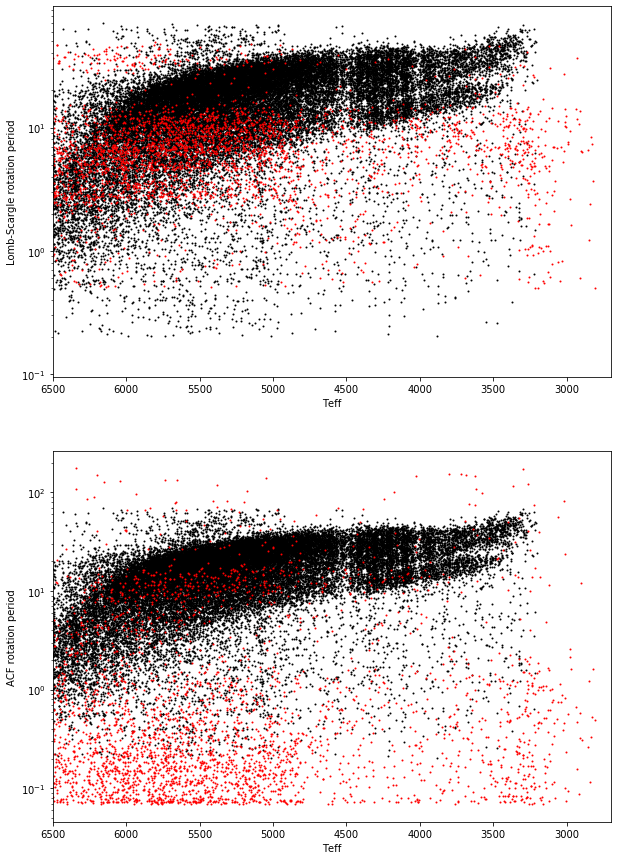

In [63]:
#plotting


f, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
ax2.scatter(temp,acfrp2,s=1,color='r', zorder=1)
ax2.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax2.set_ylabel('ACF2 rotation period')
ax2.set_xlabel('Teff')
#ax2.set_ylim(0,50)
ax2.set_xlim(6500,2700)
ax2.set_yscale('log')

ax1.scatter(temp,lsrp1,s=1,color='r', zorder=1)
ax1.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax1.set_ylabel('Lomb-Scargle rotation period')
ax1.set_xlabel('Teff')
#ax1.set_ylim(0,50)
ax1.set_xlim(6500,2700)
ax1.set_yscale('log')



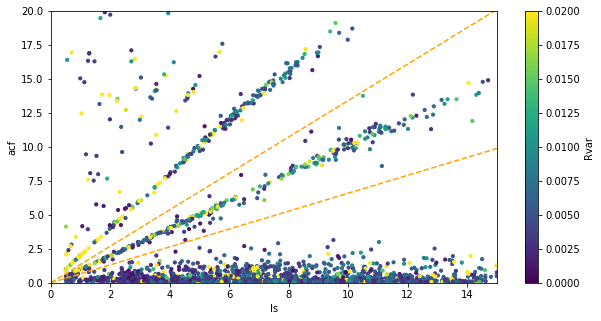

In [69]:
#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp2,s=10,c=Rvar,vmax=.02,vmin=0)
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')
plt.xlabel('ls');
plt.ylabel('acf-2');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);

In [66]:
#cutting to only agreement area

statsagree = finalt5[(finalt5['acf2'] / finalt5['ls1'] <= 1.341) & (finalt5['acf2'] / finalt5['ls1'] >= 0.659)]
len(statsagree)

349

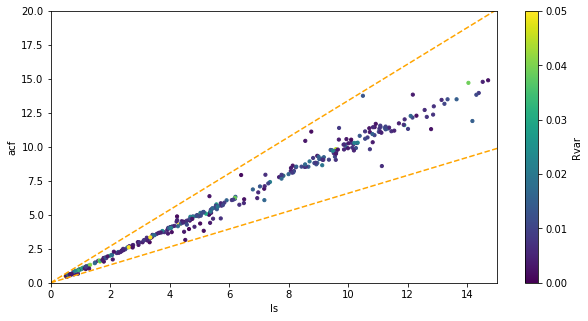

In [65]:
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))
plt.scatter(statsagree['ls1'],statsagree['acf2'],s=10,c=statsagree['rvar'],vmax=.05,vmin=0)
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')
plt.xlabel('ls');
plt.ylabel('acf-2');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);

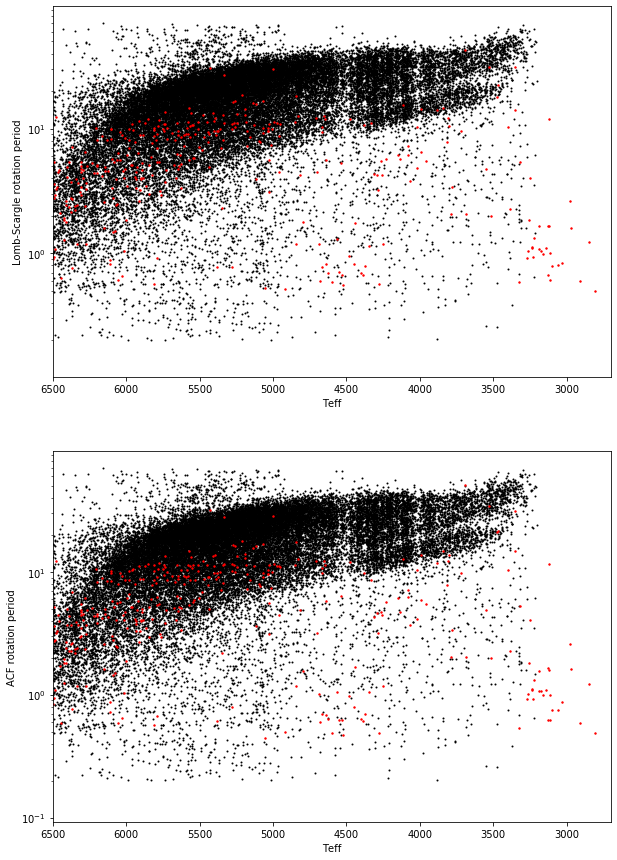

In [68]:
#plotting


f, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
ax2.scatter(statsagree['Teff'],statsagree['acf2'],s=2,color='r', zorder=1)
ax2.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax2.set_ylabel('ACF rotation period')
ax2.set_xlabel('Teff')
#ax2.set_ylim(0,50)
ax2.set_xlim(6500,2700)
ax2.set_yscale('log')

ax1.scatter(statsagree['Teff'],statsagree['ls1'],s=2,color='r', zorder=1)
ax1.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax1.set_ylabel('Lomb-Scargle rotation period')
ax1.set_xlabel('Teff')
#ax1.set_ylim(0,50)
ax1.set_xlim(6500,2700)
ax1.set_yscale('log')


